# Deliverable 2: Scrape and Analyse Mars Weather Data

In [84]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [3]:
browser = Browser('chrome')

In [4]:
# Visit the Mars NASA news site
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)
# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

False

In [5]:
# Scrape the website
html=browser.html
# Create a BeautifulSoup object from the scraped HTML
soup = BeautifulSoup(html, 'html.parser')

In [31]:
# Extract all rows of data
rows_collection=soup.find_all('tr',class_='data-row')
#Get row headers
rows_header=[header.text for header in soup.find('table',class_='table').find_all('th')]
rows_header

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [37]:
# Create an empty list
rows_list=[]
# Loop through the scraped data to create a list of rows
for row in rows_collection:
    rows_dic={}
    row=row.find_all('td')
    for index,cell in enumerate(row):
        rows_dic[rows_header[index]]=cell.text
    rows_list.append(rows_dic)

In [39]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df=pd.DataFrame(rows_list)
#CLose the browser
browser.quit()

In [42]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0

In [45]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [50]:
# Change data types for data analysis
# Convert 'sol' column to integers
mars_weather_df['sol'] = mars_weather_df['sol'].astype('int64')
mars_weather_df['month'] = mars_weather_df['month'].astype('int64')
mars_weather_df['ls'] = mars_weather_df['ls'].astype('int64')

# Convert 'min_temp' and 'pressure' columns to float numbers
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

# Convert 'terrestrial_date' column to datetime objects
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

In [51]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [58]:
# 1. How many months are there on Mars?
months_on_mar=mars_weather_df['month'].groupby(mars_weather_df['month']).count()
months_on_mar

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [62]:
# 2. How many Martian days' worth of data are there?
len(mars_weather_df)

1867

In [60]:
# 3. What is the average low temperature by month?
avg_low_temp_by_month=mars_weather_df['min_temp'].groupby(mars_weather_df['month']).mean()
avg_low_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<Axes: xlabel='month', ylabel='Temperature in Celsius'>

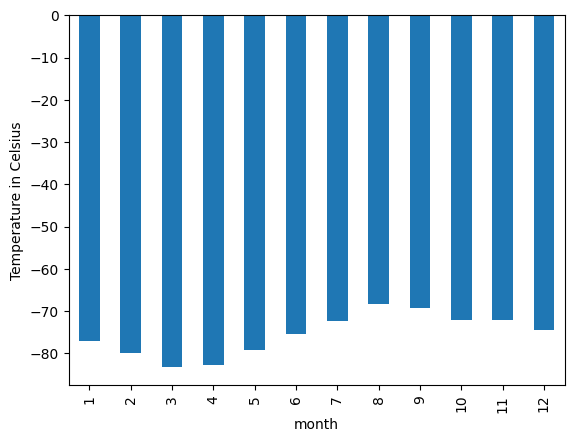

In [65]:
# Plot the average temperature by month
avg_low_temp_by_month.plot(kind='bar',ylabel='Temperature in Celsius')

<Axes: xlabel='month', ylabel='Temperature in Celsius'>

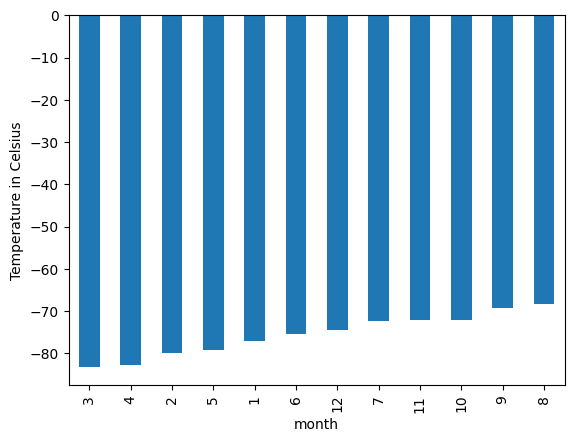

In [68]:
# Identify the coldest and hottest months in Curiosity's location
avg_low_temp_by_month.sort_values().plot(kind='bar',ylabel='Temperature in Celsius')

In [69]:
# 4. Average pressure by Martian month
avg_pressure_by_month=mars_weather_df['pressure'].groupby(mars_weather_df['month']).mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<Axes: xlabel='month', ylabel='Atmospheric Pressure'>

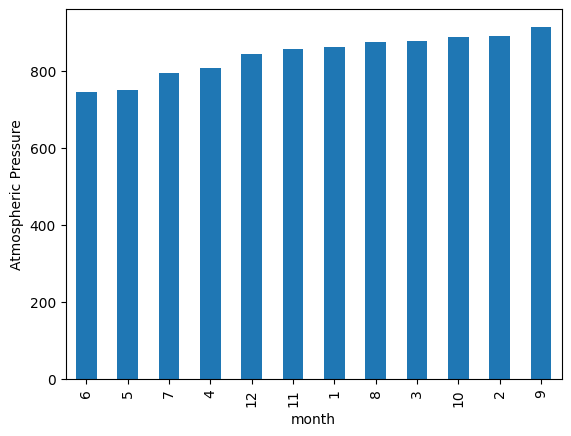

In [70]:
avg_pressure_by_month.sort_values().plot(kind='bar',ylabel='Atmospheric Pressure')

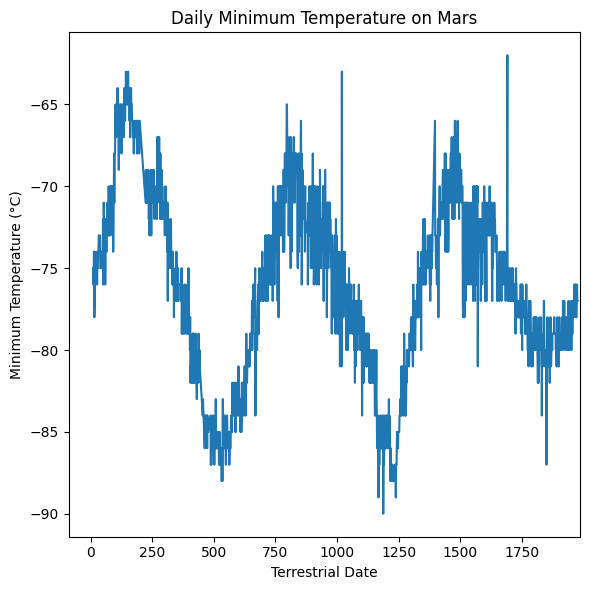

In [83]:
# Sort the DataFrame by 'terrestrial_date' in ascending order (optional but recommended for plotting)
mars_weather_df = mars_weather_df.sort_values(by='terrestrial_date')

# Plotting the daily minimum temperature
plt.figure(figsize=(6, 6))
plt.plot(mars_weather_df['sol'], mars_weather_df['min_temp'], linestyle='-')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (Â°C)')
plt.title('Daily Minimum Temperature on Mars')
plt.xlim(mars_weather_df['sol'].min()-100,mars_weather_df['sol'].max()+10)
plt.tight_layout()
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest.

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 175-850-1525, or ~675 days. A year on Mars appears to be about 675 days from the plot.

In [86]:
# Write the data to a CSV
mars_weather_df.to_csv(Path('Results\mars_weather.csv'))